In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('./data/samsung.xlsx')
df

,date,volume,per,pbr,institution,corp,retail,foreign,atr,nasdaq,sp,cboe,exchangerate,futures2y,futures10y,y
0,2011-09-01,35870550,7.27,1.24,-83833734000,-8749641000,-177822918000,270406293000,880,"2,546.00","1,204.42",31.82,"1,064.40",110.28,130.61,15420
1,2011-09-02,12934100,7.26,1.23,-7185878000,2125969000,-11377060000,16436969000,360,"2,480.30","1,173.97",33.92,"1,065.60",110.25,131.30,15380
2,2011-09-05,13874400,6.90,1.17,-975699000,-215641000,29370756000,-28179416000,780,"2,480.30","1,173.97",33.92,"1,065.60",110.25,131.30,14620
3,2011-09-06,13225250,6.86,1.17,2349662000,-1299409000,13839817000,-14890070000,520,"2,473.80","1,165.24",37.00,"1,074.65",110.27,131.22,14540
4,2011-09-07,17575200,7.29,1.24,113232351000,1123519000,-77907268000,-36448602000,1020,"2,548.90","1,198.62",33.38,"1,069.65",110.27,130.89,15460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2456,2021-08-25,22319664,19.71,1.92,-76990474100,-8894667500,82373232300,3511909300,1700,"15,041.90","4,496.19",16.79,"1,163.87",110.25,133.63,75700
2457,2021-08-26,16671494,19.42,1.89,-55566537800,9344981600,142574757300,-96353201100,1600,"14,945.80","4,469.91",18.84,"1,170.53",110.25,133.59,74600
2458,2021-08-27,15172748,19.34,1.89,173118394100,10372274300,1510887500,-185001555900,1200,"15,129.50","4,509.37",16.39,"1,161.23",110.30,133.89,74300
2459,2021-08-30,12686999,19.42,1.89,24586418600,-2401179400,54715193800,-76900433000,1300,"15,265.90","4,528.79",16.19,"1,164.34",110.32,134.13,74600


In [4]:
df_copy = df[['date', 'y']].copy()

In [5]:
df_copy.columns = ['day', 'price']

In [6]:
df_copy.set_index('day', inplace=True)

In [7]:
df_copy

,price
day,
2011-09-01,15420
2011-09-02,15380
2011-09-05,14620
2011-09-06,14540
2011-09-07,15460
...,...
2021-08-25,75700
2021-08-26,74600
2021-08-27,74300


findfont: Font family ['sans_serif'] not found. Falling back to DejaVu Sans.


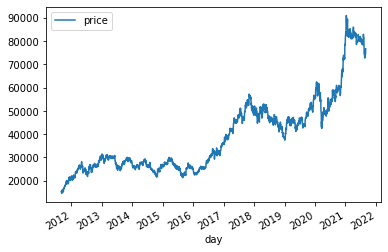

In [8]:
df_copy.plot()
plt.show()

In [9]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

model = ARIMA(df_copy.price.values, order=(3,1,3))
model_fit = model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary())

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIM

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 2460
Model:                 ARIMA(3, 1, 3)   Log Likelihood              -19597.729
Method:                       css-mle   S.D. of innovations            697.542
Date:                Tue, 05 Oct 2021   AIC                          39211.458
Time:                        16:41:13   BIC                          39257.921
Sample:                             1   HQIC                         39228.340
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.0541     13.324      1.880      0.060      -1.060      51.168
ar.L1.D.y     -0.6118      0.149     -4.100      0.000      -0.904      -0.319
ar.L2.D.y      0.3254      0.220      1.479      0.1

In [10]:
samsung_train_df = df_copy[:-20]
samsung_test_df = df_copy[-20:]

In [11]:
forecast_data = model_fit.forecast(steps=20) 

# 마지막 5일의 예측 데이터 (2021-04-15 ~ 2021-04-19)
pred_arima_y = forecast_data[0].tolist()

# 실제 5일의 데이터 (2021-04-15 ~ 2021-04-19)
test_y = samsung_test_df.price.values

# 마지막 5일의 예측 데이터 최소값
pred_y_lower = []
# 마지막 5일의 예측 데이터 최대값
pred_y_upper = []

for lower_upper in forecast_data[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)

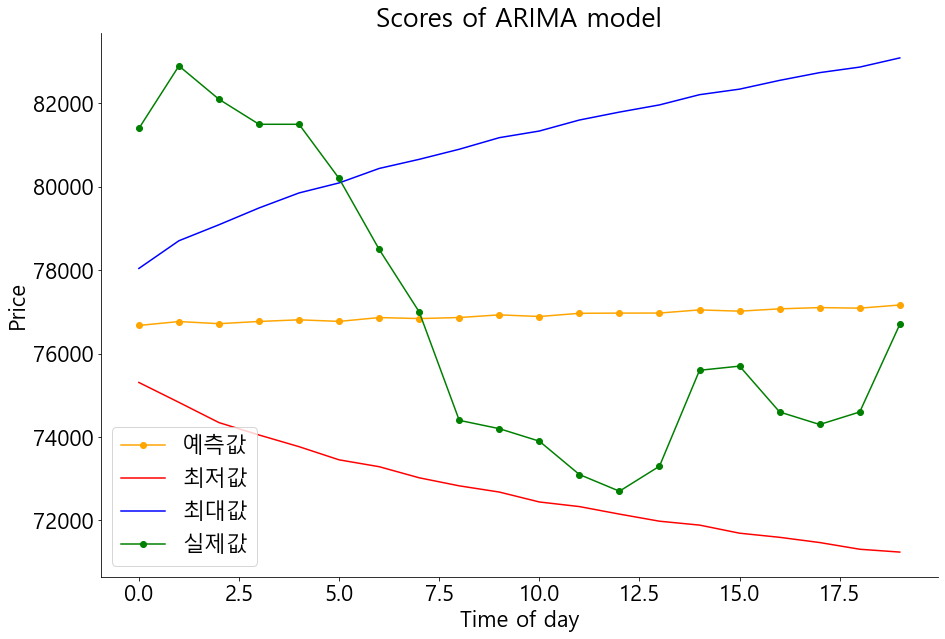

In [12]:
fig = plt.figure(figsize=(15, 10))
plt.rc('font', family='Malgun Gothic',size=22)

ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성
ax.spines['right'].set_visible(False) ## 오른쪽 축 숨김
ax.spines['top'].set_visible(False) ## 위쪽 축 숨김


bbox = dict( ## 텍스트 박스 스타일 지정
    boxstyle='square', # 박스 모양
    facecolor='white', # 박스 배경색 
)

 # 모델이 예측한 가격 그래프
plt.plot(pred_arima_y, color = 'orange', marker='o')

# 모델이 예측한 최저 가격 그래프
plt.plot(pred_y_lower, color = 'red')

# 모델이 예측한 최고 가격 그래프
plt.plot(pred_y_upper, color = 'blue')

# 실제 가격 그래프
plt.plot(test_y, color = 'green', marker='o')
plt.xlabel('Time of day')
plt.ylabel('Price')

plt.legend(['예측값', '최저값','최대값','실제값'])
plt.title("Scores of ARIMA model")
plt.savefig('ARIMA.png')
plt.show()